## Linear Regression With One Variable
In this part of this exercise,  you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant  franchise  and  are  considering  different  cities  for  opening  a  new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.You would like to use this data to help you select which city to expand to next. 

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Visualizing the data
ex1_df = pd.read_csv('ex1data1.txt')
ex1_df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


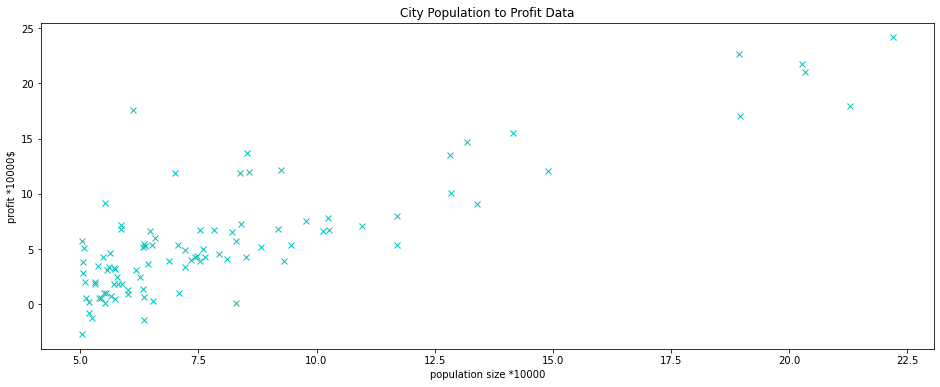

In [3]:
xx = ex1_df['population']
yy = ex1_df['profit']

plt.figure(figsize=(16, 6))
plt.xlabel('population size *10000')
plt.ylabel('profit *10000$')
plt.title("City Population to Profit Data")
plt.plot(xx,yy, 'xc')
plt.show()

In [4]:
ex1_df.insert(0, 'ones', 1)
#del ex1_df['ones']
ex1_df.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
cols = ex1_df.shape[1]

X_df = ex1_df.iloc[:,0:cols-1]
y_df = ex1_df.iloc[:,cols-1:cols]

X = np.matrix(X_df.values)
y = np.matrix(y_df.values)
theta = np.matrix(np.zeros(2))

m = len(y)
alpha = 0.01
iters = 1000

In [9]:
# Cost Function
def computeCost(X, y, theta, m):
    
    difference = (X*theta.T)-y # output of hypothesis function (prediction) - an actualy value
    J = (1/(2*m) * np.power(difference,2)).sum()
    
    return J

In [10]:
J = computeCost(X,y,theta,m)
J_test = computeCost(X,y,np.matrix([-1,2]),m)

print("Cost function for theta=[0;0]  is {}".format(J))
print("Cost function for theta=[-1;2] is {}".format(J_test))

Cost function for theta=[0;0]  is 32.07273387745567
Cost function for theta=[-1;2] is 54.24245508201237


In [11]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #copying the shape of theta matrix
    parameters = theta.ravel().shape[1]     #setting up the number of inner loops
    cost = np.zeros(iters)                  #counting J at each loop
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta, m)
        
    return theta, cost

In [12]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

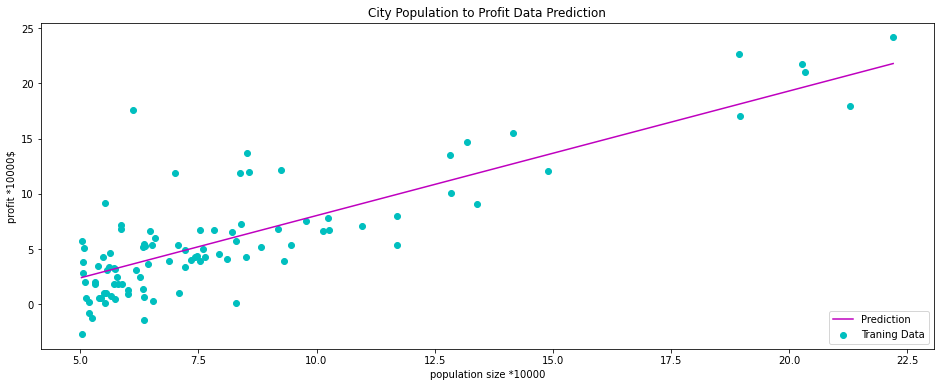

In [35]:
x = np.linspace(ex1_df.population.min(), ex1_df.population.max(), 100) 
# alternatively it is okay to just use xx, but the line will apper dotted, and not as a straight line
fitting_function = g[0,0] + (g[0,1]*x)

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, fitting_function, c='m', label='Prediction') #plotting the fitting line
ax.scatter(ex1_df.population, ex1_df.profit, c='c',label='Traning Data')

ax.set_xlabel('population size *10000')
ax.set_ylabel('profit *10000$')
ax.set_title('City Population to Profit Data Prediction')
ax.legend(loc=4)

plt.show()

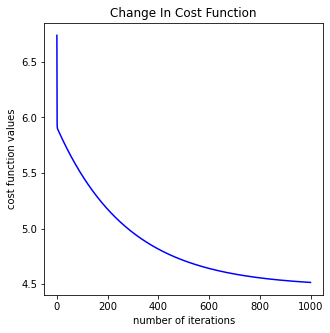

In [39]:
#x_iters = iters
#y_cost = 

plt.figure(figsize=(5, 5))
plt.xlabel('number of iterations')
plt.ylabel('cost function values')
plt.title("Change In Cost Function")
plt.plot(np.arange(iters), cost, c='b')
plt.show()